https://medium.com/@wilamelima/analysing-bike-sharing-trends-with-python-a9f574c596b9

This is a problem on logistics.Logistics important because it helps us to decide how many bikes will be needed on a given place and time. Sometimes, we have to decide how many vehicles will be available on a given time of the day. Bikes are more used on a time of the year and not on another. How to predict this demand?

***We are predicting the demand for bikes based on the features given***

   - This is a regression problem

## 1.1 Import required packages

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas import set_option

# setting params
params = {'legend.fontsize': 'large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}

sns.set_style('whitegrid')
sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# pandas display data frames as tables
from IPython.display import display, HTML

In [190]:
from sklearn.model_selection import KFold,cross_val_score,train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso ,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor

from sklearn.metrics import mean_squared_error

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Function for applying one hot encoding on columns

#data_dummy = data

#def dummify_dataset(df, column):       
#    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
#    df = df.drop([column], axis=1)
#    return df

#columns_to_dummify = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
#for column in columns_to_dummify:
#    data_dummy = dummify_dataset(data_dummy, column)
    
#data_dummy.head(1)

## 1.2 Load Dataset

In [5]:
df = pd.read_csv('Bike_sharing_hour.csv')
print(df.shape)

(17379, 17)


In [6]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 1.3 Data Types and Summary Stats

In [7]:
# Checking the datatypes

df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [83]:
df.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The dataset has:
+ 17 attributes in total and 17k+ records
+ Except dtedat, rest all are numeric(int or float)
+ As stated on the UCI dataset page, the following attributes have been normalized (same is confirmed above):
    + temp, atemp
    + humidity
    + windspeed
+ Dataset has many categorical variables like season, yr, holiday, weathersit and so on. These will need to handled with care

## 1.4 Standardize Attribute Names

In [21]:
# renaming the columns

df.rename(columns={'instant' : 'rec_id',
                     'dteday' : 'datetime',
                     'holiday' : 'is_holiday',
                     'workingday' : 'is_workingday',
                     'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'hum': 'humidity',
                     'yr' : 'year',
                     'cnt':'count'},inplace=True)

## 1.5 Checking for missing values

In [23]:
# Checking for missing data

df.isnull().sum()

rec_id           0
datetime         0
season           0
year             0
month            0
hour             0
is_holiday       0
weekday          0
is_workingday    0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual           0
registered       0
count            0
dtype: int64

## 1.6 Typecast Attributes

In [26]:
# typecasting the features

df['datetime'] = pd.to_datetime(df.datetime)   # converting datetime column to pandas datetime format

# categorical variables

df['season'] = df.season.astype('category')
df['is_holiday'] = df.is_holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather'] = df.weather.astype('category')
df['is_workingday'] = df.is_workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')

In [28]:
df.dtypes

rec_id                    int64
datetime         datetime64[ns]
season                 category
year                   category
month                  category
hour                   category
is_holiday             category
weekday                category
is_workingday          category
weather                category
temp                    float64
atemp                   float64
humidity                float64
windspeed               float64
casual                    int64
registered                int64
count                     int64
dtype: object

## 2.0 Visualize Attributes, Trends and Relationships

### Hourly distribution of Total Counts
+ Seasons are encoded as 1:spring, 2:summer, 3:fall, 4:winter
+ Exercise: Convert season names to readable strings and visualize data again

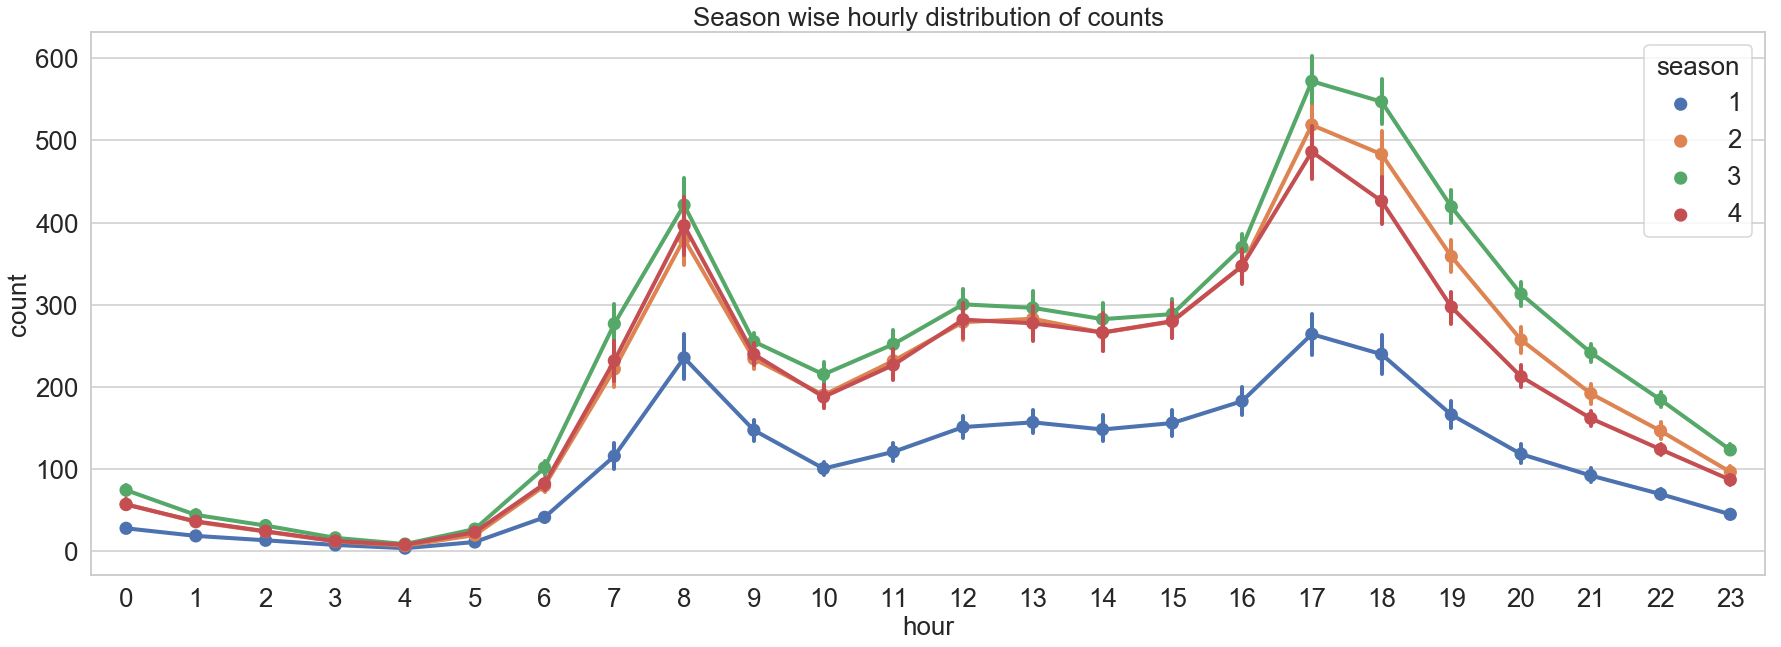

In [46]:
# visualization

# Hourly ridership counts accross the week(how users use the system each season)


fig ,ax = plt.subplots()
sns.pointplot(data= df[['hour',
                        'count',
                        'season']],
             x = 'hour' , y = 'count',
             hue = 'season' , ax = ax)
ax.set(title = 'Season wise hourly distribution of counts');

**Observations**

   - The plot above shows similar trend for all seasons with peak counts in the morning (7-9 a.m) and in the evening (4-6 p.m) due to high movement at the start and end of office/school
   
   

### Note 

   - Weeknends - 0 and 6
   - Weekdays 1 to 5

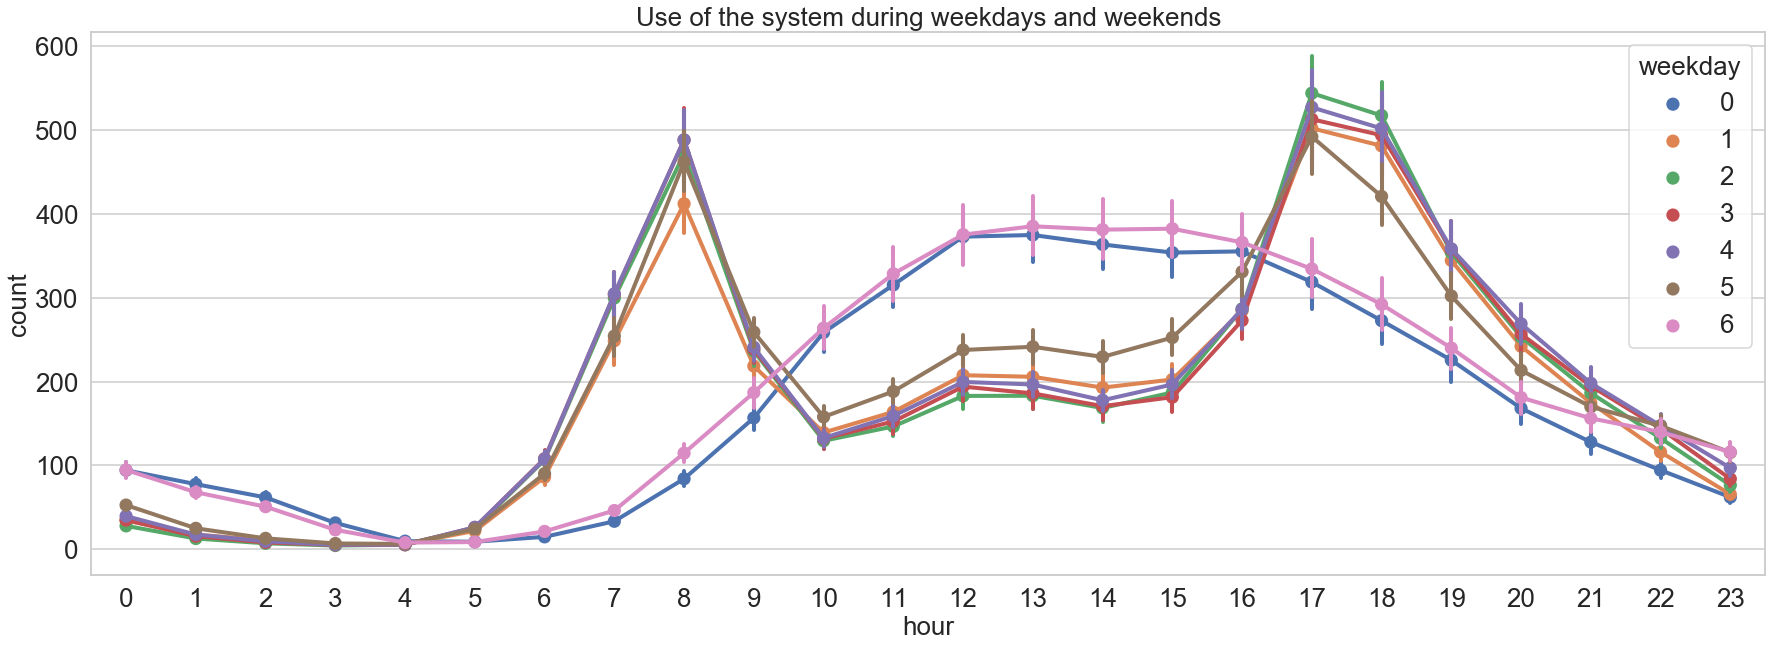

In [48]:
# Use of system during weekdays and weekends

fig , ax = plt.subplots()

sns.pointplot(data = df[['hour','count','weekday']] , x = 'hour' ,y = 'count' ,hue = 'weekday' , ax= ax)
ax.set(title="Use of the system during weekdays and weekends");

**Observations :**
+ Weekends (0 and 6) and Weekdays (1-5) show different usage trends with weekend's peak usage in during afternoon hours
+ Weekdays follow the overall trend, similar to one visualized in the previous plot
+ Weekdays have higher usage as compared to weekends

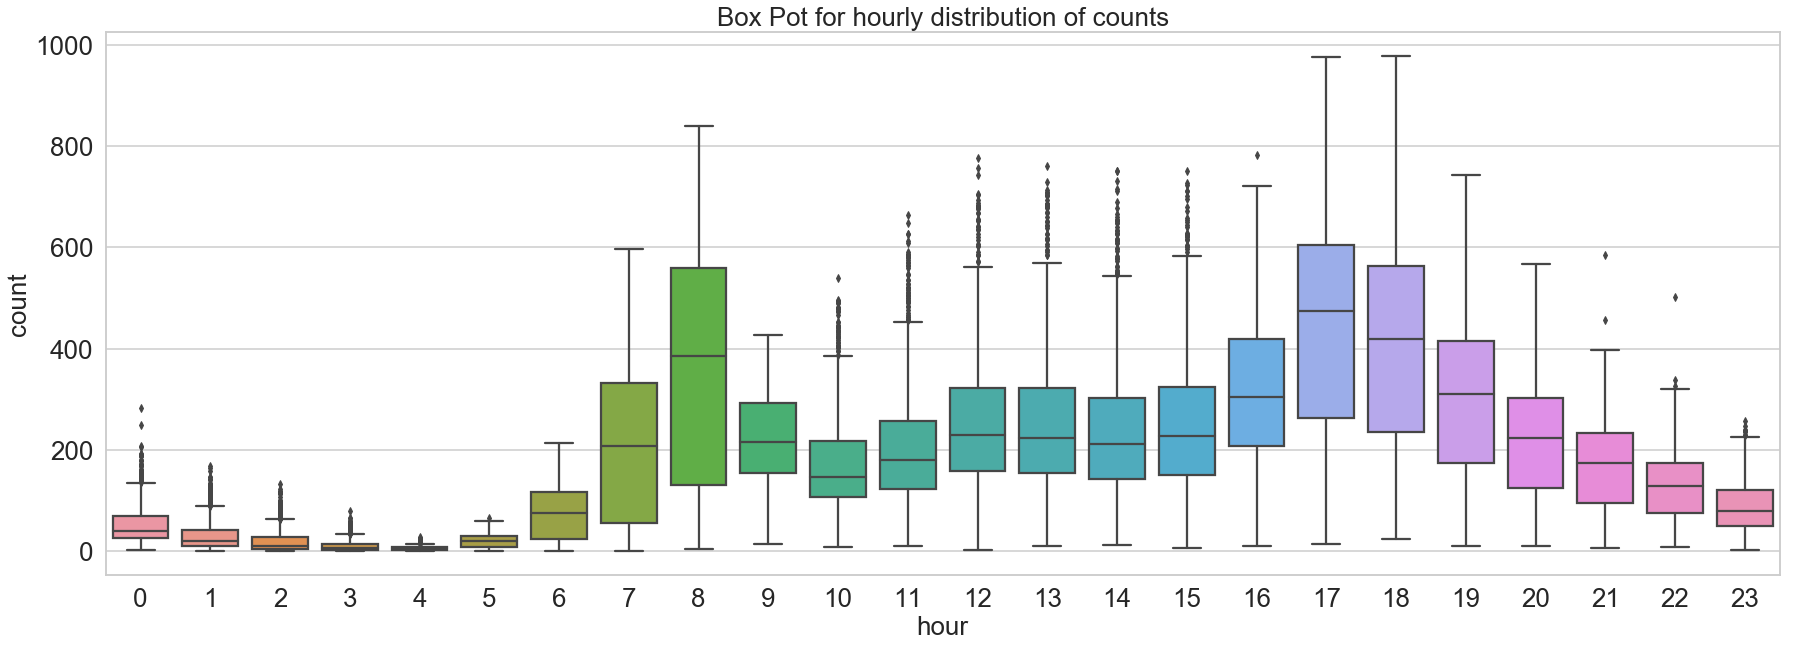

In [85]:
fig, ax = plt.subplots()
sns.boxplot(data = df[['hour' , 'count']] , x = 'hour' ,y = 'count')
ax.set(title = "Box Pot for hourly distribution of counts");

**Observations**
+ Early hours (0-4 a.m) and late hours(21-23 a.m) have low counts but significant outlier
+ Afternoon hours also havee significant hours
+ Peak hours have higher counts and median values and almost no outliers

## 2.1 Monthly distribution of Total Counts

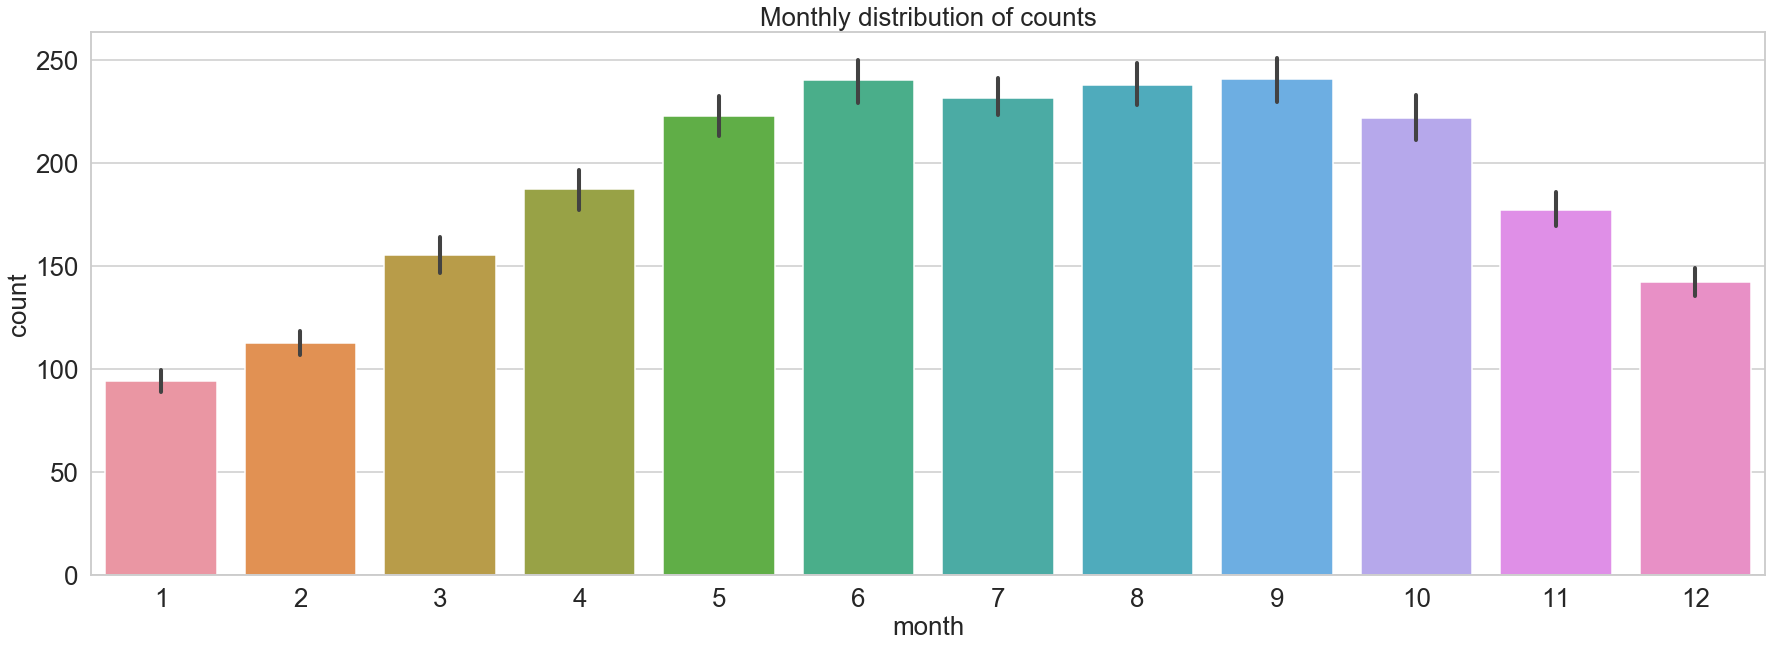

In [50]:
# Checking for any aggregatd trends i.e  monthly ridership trends

fig, ax = plt.subplots()
sns.barplot(data = df[['month' , 'count']] , x = 'month' ,y = 'count')
ax.set(title = 'Monthly distribution of counts');

**Observations:**
+ Months June to Oct seems to have the highest counts for bikeriders

## 2.2 Seasonal distribution of counts based on seasons

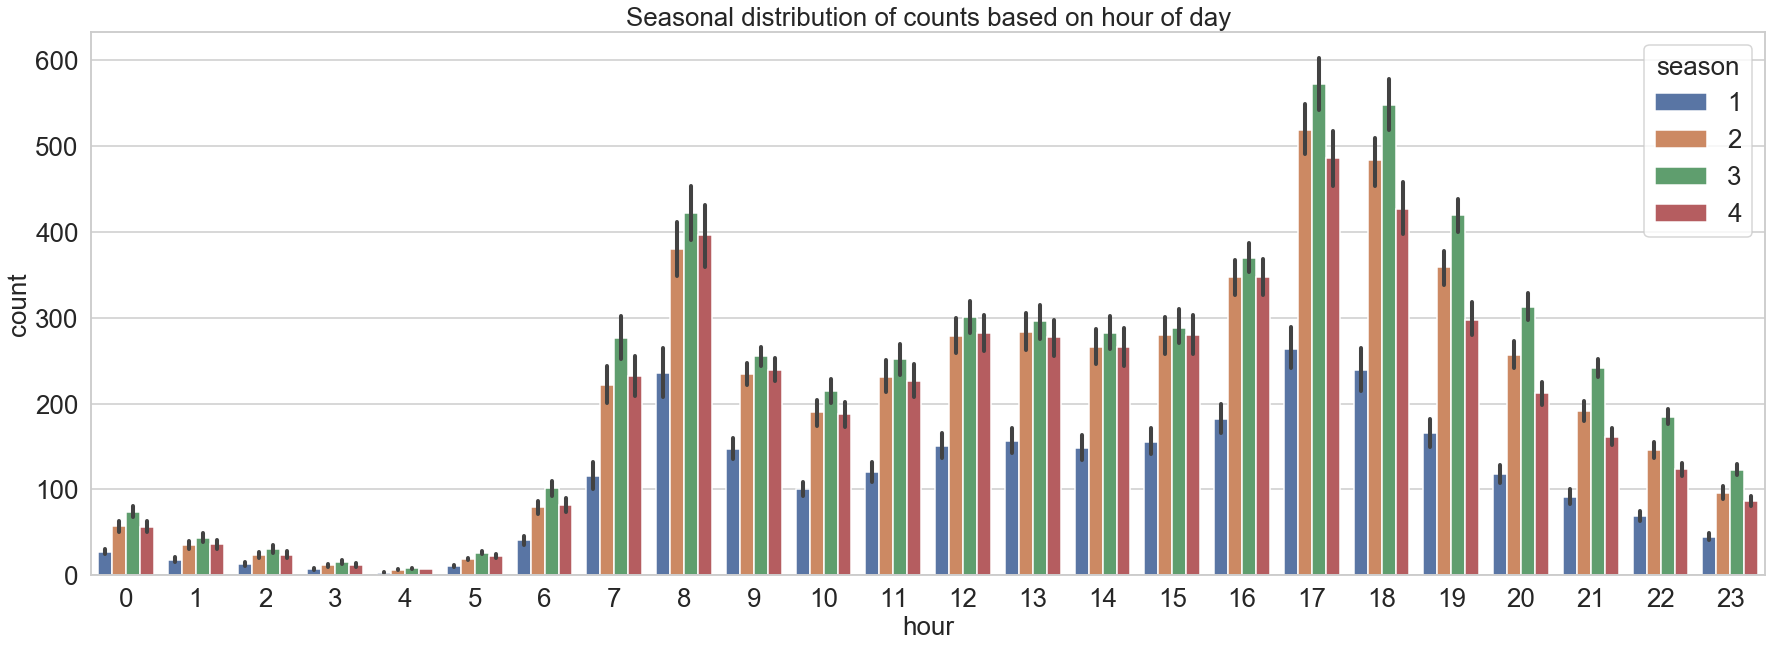

In [59]:
fig ,ax = plt.subplots()
sns.barplot(data = df[['hour','count','season']] ,x = 'hour' ,y = 'count' , hue = 'season')
ax.set(title = 'Seasonal distribution of counts based on hour of day');

**Observations:**
+ Peak hours for all the seasons seem to be (7-8 a.m) and at late night (17 - 20 hrs) 

## 2.3 Seasonal distribution with subplots

[Text(0.5, 1.0, 'Winter')]

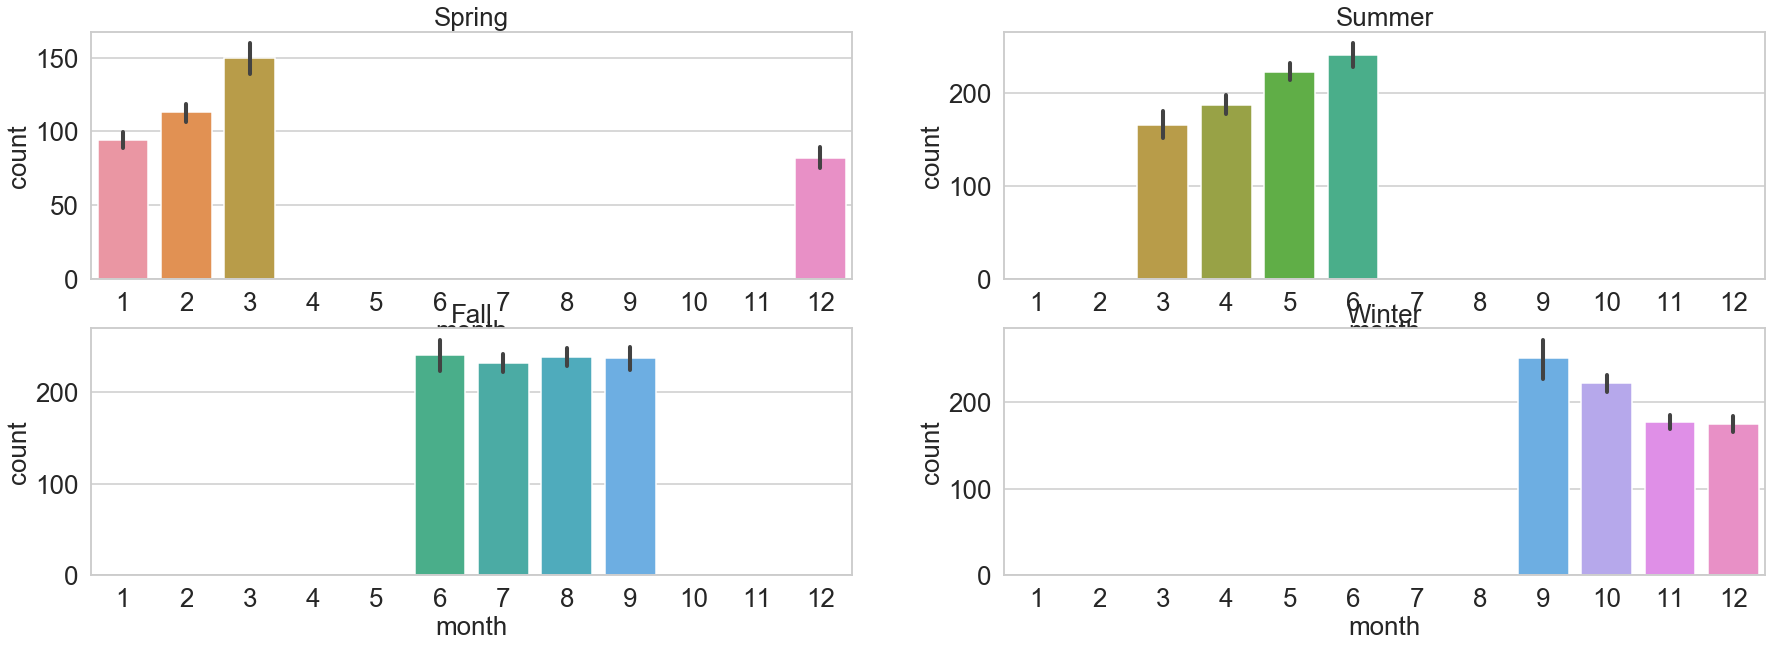

In [67]:
# 1:spring, 2:summer, 3:fall, 4:winter
# Subplots of 4 seasons with thier 

df_col = ['month' ,'weekday' ,'count']
plot_col = ['month' , 'count']

spring_df = df[df.season == 1][df_col]
summer_df = df[df.season == 2][df_col]
fall_df = df[df.season == 3][df_col]
winter_df = df[df.season == 4][df_col]

# plotting subplots

fig,ax = plt.subplots(nrows=2 , ncols=2)

sns.barplot(data = spring_df[plot_col] , x = 'month' , y= 'count' , ax =ax[0][0],)
ax[0][0].set(title = 'Spring')

sns.barplot(data= summer_df[plot_col] , x = 'month' , y = 'count' , ax = ax[0][1],)
ax[0][1].set(title = 'Summer')

sns.barplot(data= fall_df[plot_col] , x = 'month' , y = 'count' , ax = ax[1][0],)
ax[1][0].set(title = 'Fall')

sns.barplot(data= winter_df[plot_col] , x = 'month' , y = 'count' , ax = ax[1][1],)
ax[1][1].set(title = 'Winter')

**Observations**

+ End of summer(from month of June i.e 6) followed by fall till the month of Oct (i.e 9) have the highest users in the system
+ Along with the advent of winter this trend dies down and slowly rises again along with the coming of spring 

## 2.4 Year Wise Count Distributions

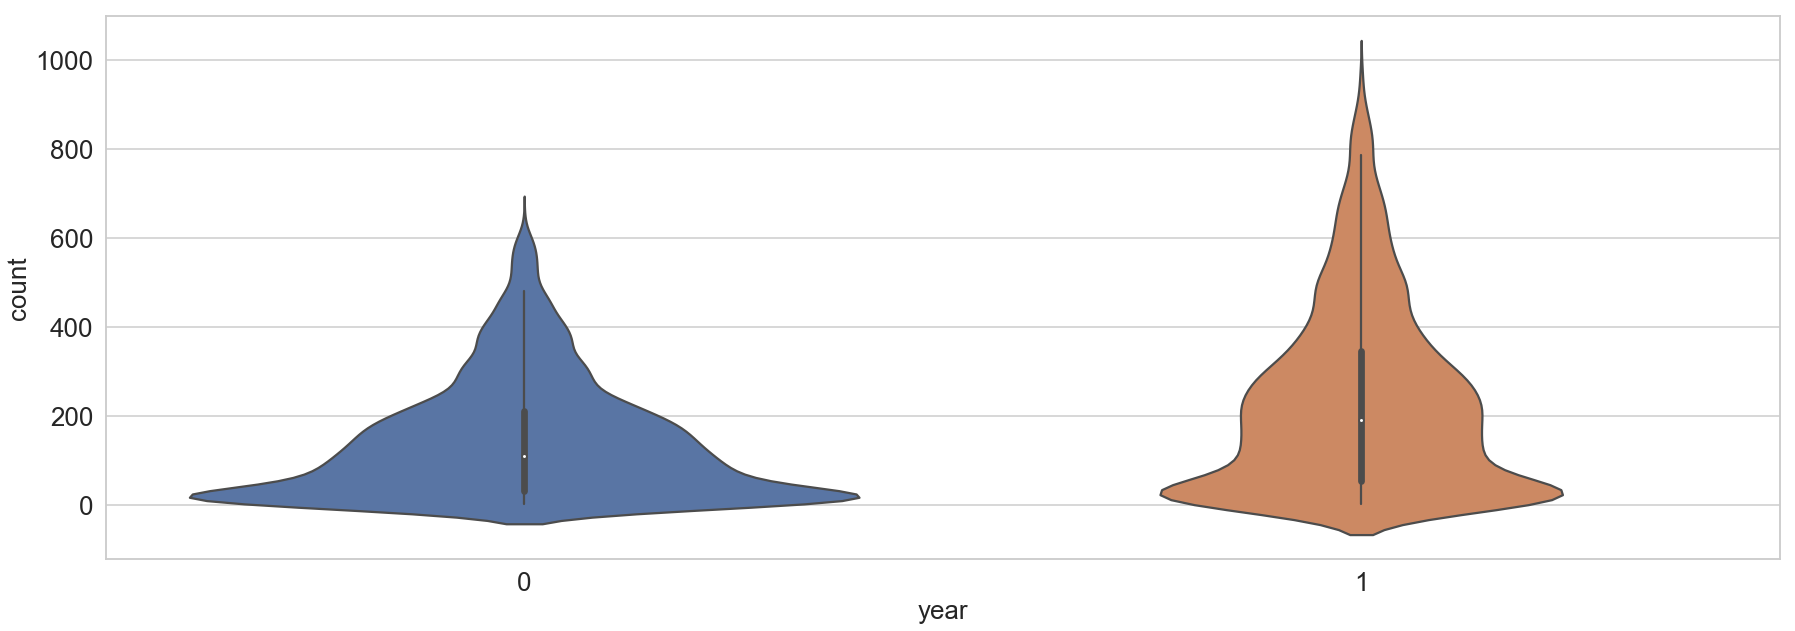

In [70]:
# Violin pLots are better for visializing the probability density of data(pdf)

sns.violinplot(data= df[['year' , 'count']] , x= 'year' , y= 'count');

**Observations:**

+ Both years have multimodal distributions
+ 2011 has lower counts overall with a lower median
+ 2012 has a higher max count though the peaks are around 100 and 300 which is then tapering off

**Multimodal distribution is a distribution that has multiple modes (thus two or more "peaks")**

## 2.5 Understanding how casual and registered users use the vehicles on weekdays

[Text(0.5, 1.0, 'Casual riders')]

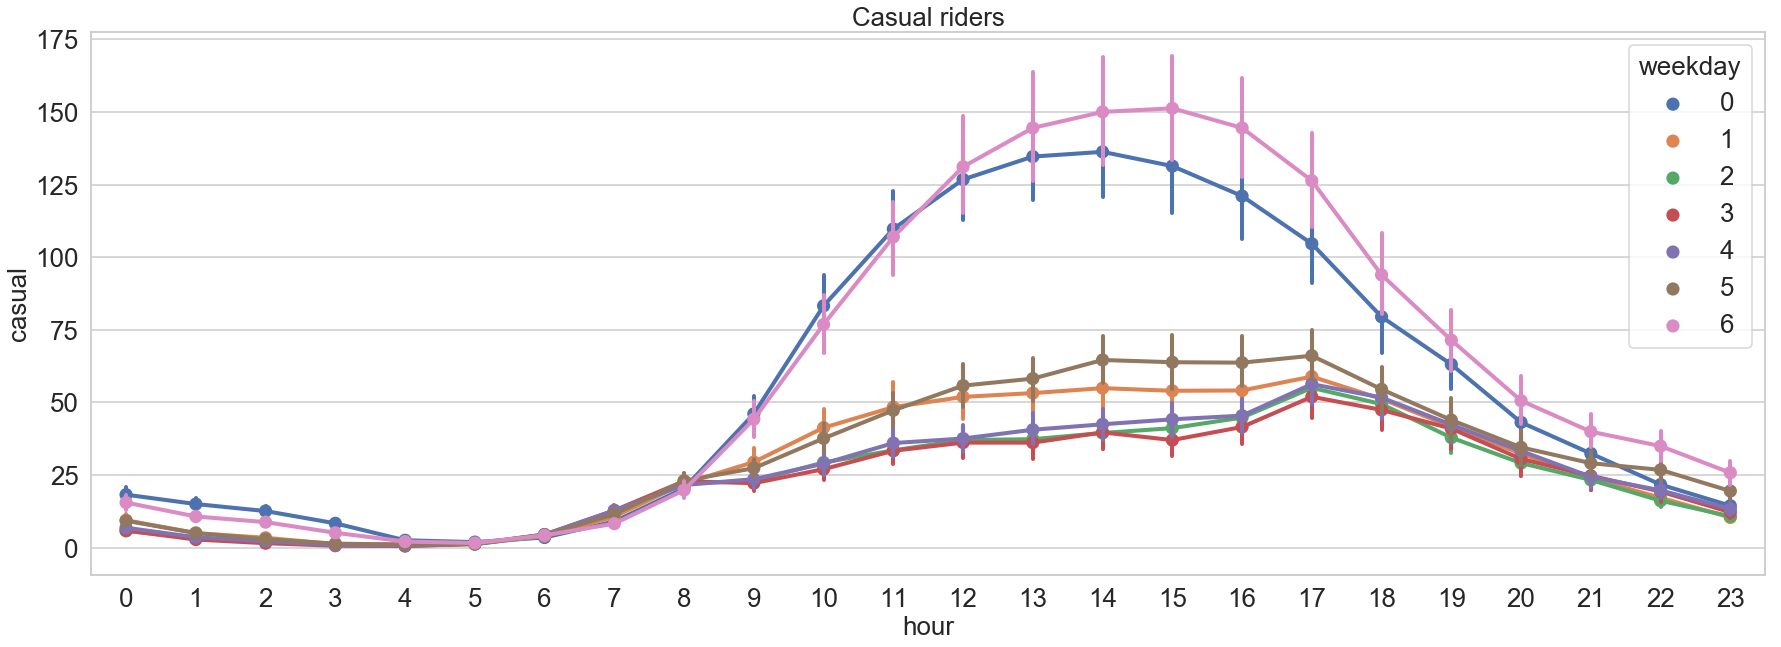

In [80]:
# understanding how casual and registered users use the vehicles on weekdays

# 0 & 6 = weekends

# Casual riders

fig, ax = plt.subplots()

sns.pointplot(data= df[['hour' , 'weekday' , 'casual']] , x = 'hour' , y = 'casual' ,hue = 'weekday' );
ax.set(title = 'Casual riders')

**Observations :**
+ Casual riders tend to ride the highest on weekends (mainly on Saturdays i.e 6) followed by a drop on Sunday and the days following after

+ Casual riders mainly ride in the afternoon times on weekdays 

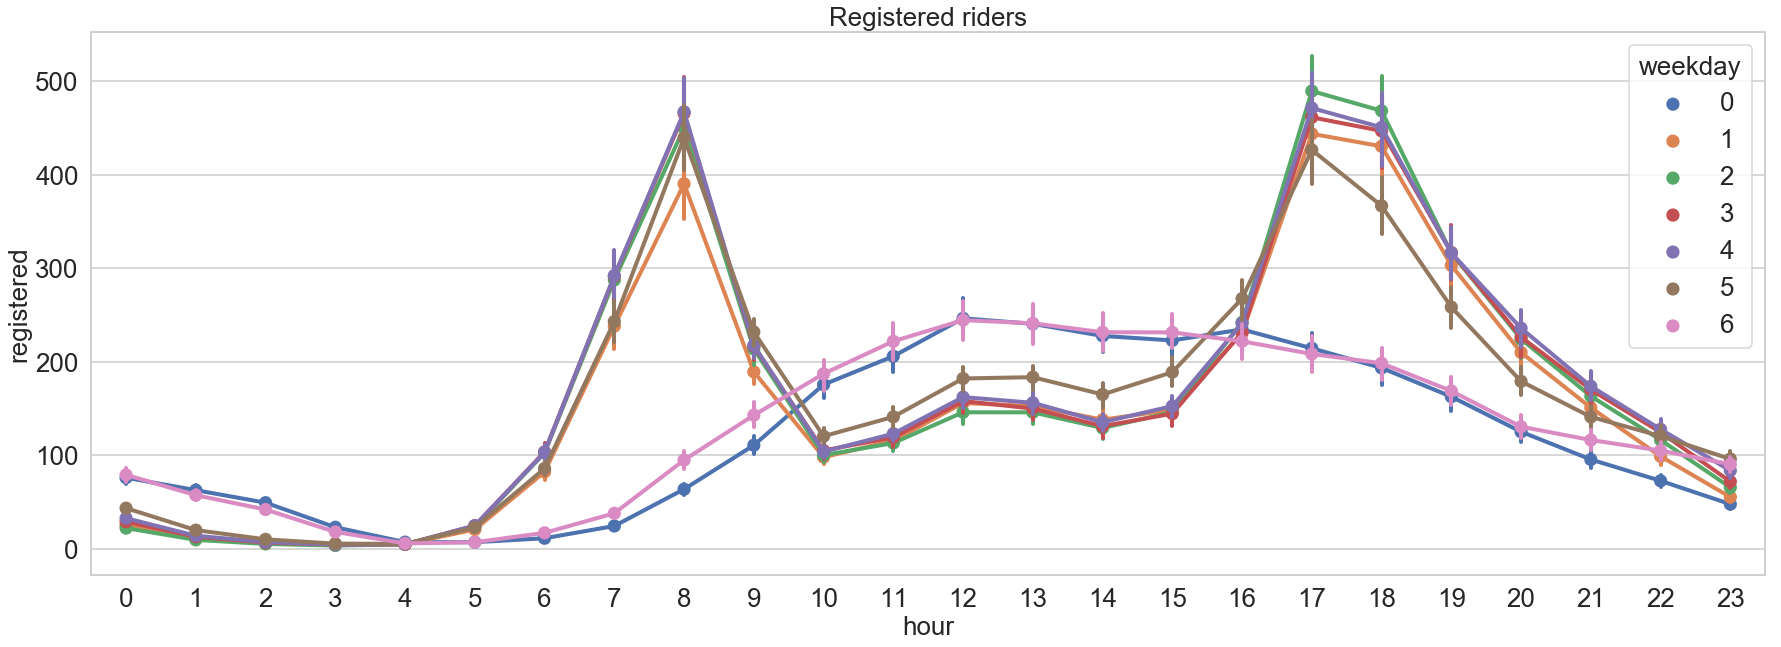

In [82]:
# registered riders

fig, ax = plt.subplots()
sns.pointplot(data =df[['hour' ,'weekday', 'registered']] ,x = 'hour' , y = 'registered' , hue = 'weekday')
ax.set(title = 'Registered riders');

**Observations:**

+ Registered riders follow the usual trend of peak traffic during the office/school hours followed by a steep drop in the afternoons and late evenings

+ On weekends the traffic of registered users is much lower compared to casual riders

## 2.6 Difference of usage when weather condition changes

In [86]:
df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

[Text(0.5, 1.0, '')]

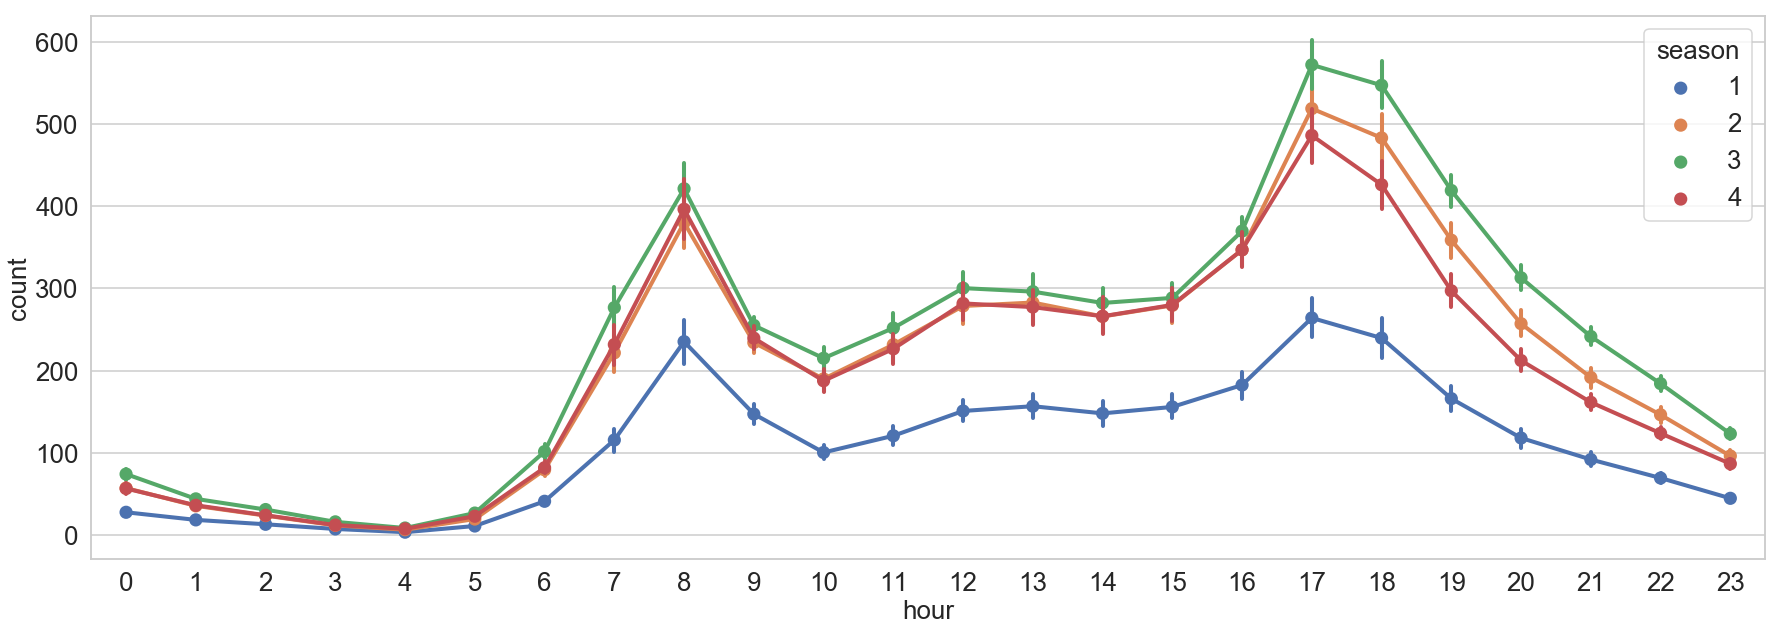

In [87]:
fig ,ax = plt.subplots()

sns.pointplot(data = df[['hour' ,'season' , 'count']] ,x = 'hour' ,y = 'count' , hue= 'season')
ax.set(title = '')

**Observations :**
+ **Seasons are encoded as 1:spring, 2:summer, 3:fall, 4:winter**
+ Afternoons in the fall seem to have the highest traffic followed by summer and winters
+ Spring seems to have the lowest traffic overall
+ Morning and the afternoon times seem to have to highest overall traffic

## 2.7 Working Day Vs Holiday Distribution

In [88]:
df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

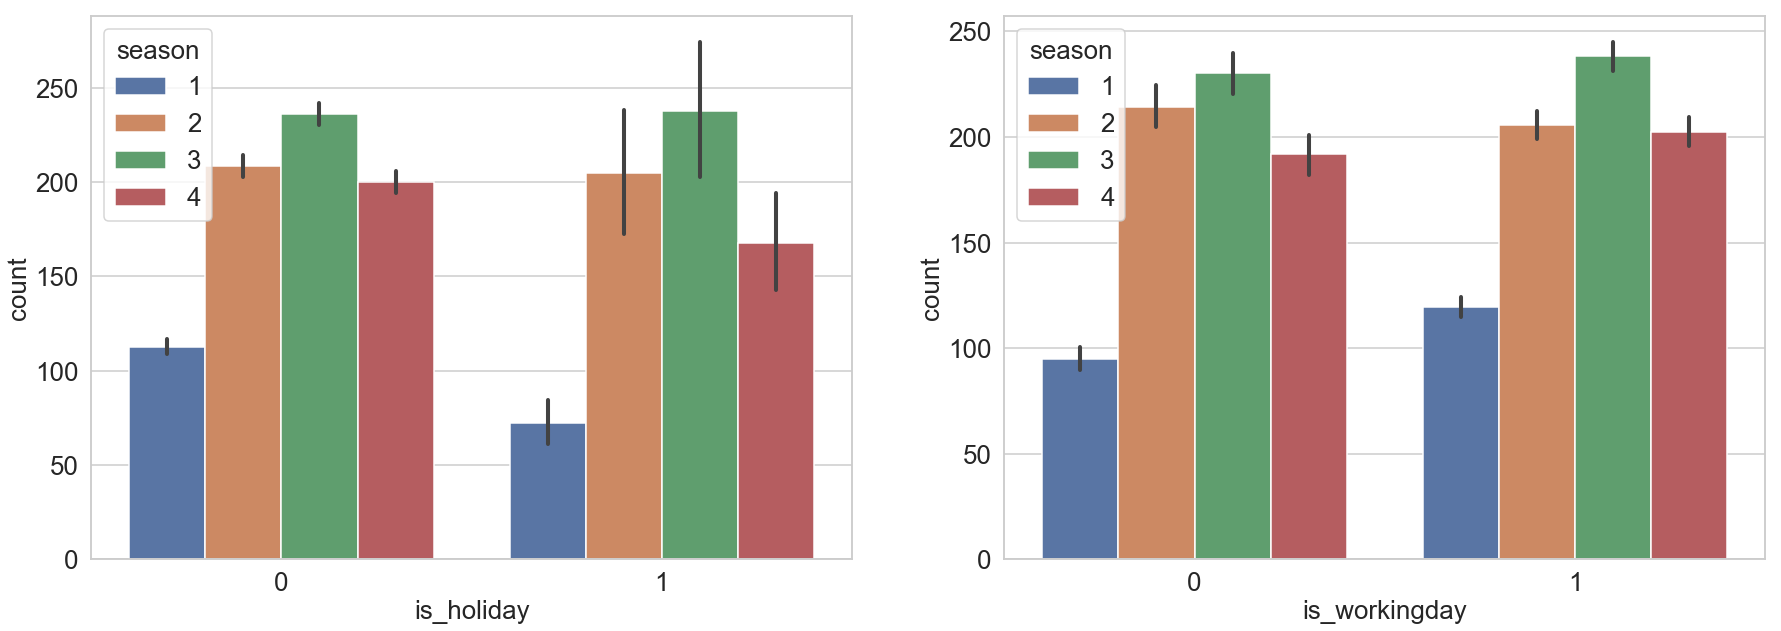

In [91]:
fig ,(ax1,ax2) = plt.subplots(ncols=2)

sns.barplot(data= df , x = 'is_holiday', y = 'count', hue = 'season', ax =ax1)
sns.barplot(data = df, x = 'is_workingday' , y = 'count' , hue = 'season' , ax =ax2);

**Observations :**

+ **Seasons are encoded as 1:spring, 2:summer, 3:fall, 4:winter**
+ Fall season seems to have the highest traffic on working days as well as non working days


## 2.8 Outliers

we usually utilize box plots to check for the outliers in the data

In [92]:
df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

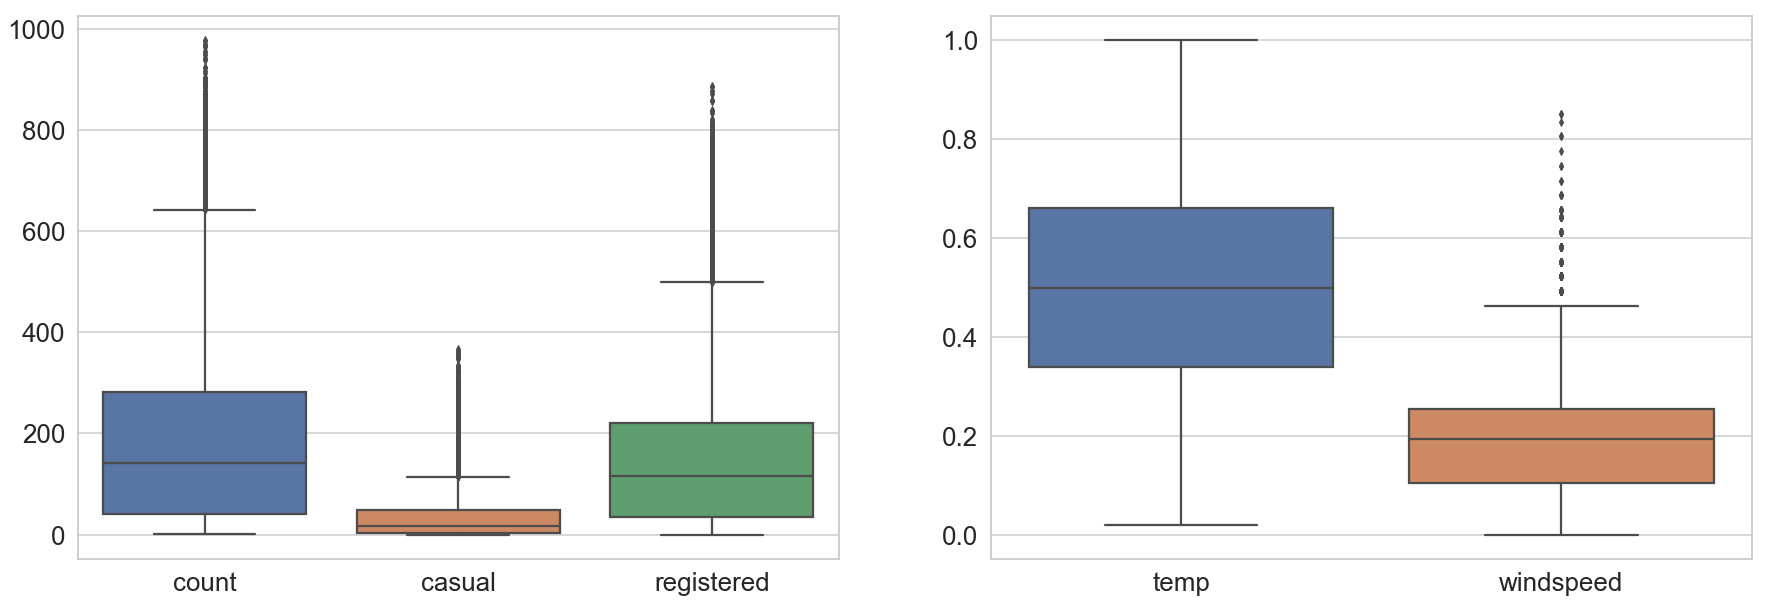

In [95]:
# for the numerical features

fig, (ax1,ax2) = plt.subplots(ncols=2)

# Count related attributes
sns.boxplot(data = df[['count','casual', 'registered']] , ax =ax1)

# Weather related attributes
sns.boxplot(data = df[['temp', 'windspeed']] ,ax = ax2);

**Observations:**

+ For the 3 count related attributes they all hav sizeable no of outliers
+ For the weather attributes of temp and windspeed ,windspeed only has outliers

## 2.9 Corrrelation matrix

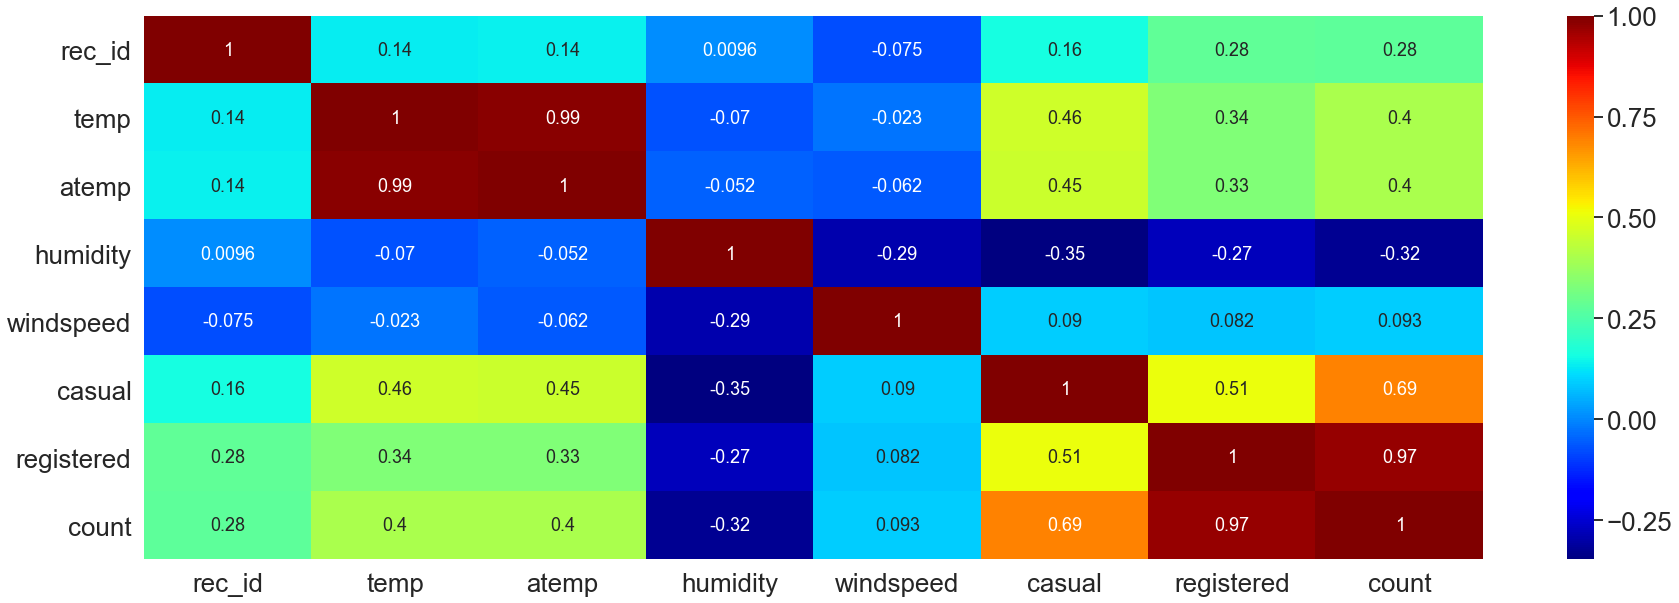

In [96]:
corr =df.corr()

sns.heatmap(data = corr ,cmap='jet' , annot= True);

In [ ]:
# alternatively



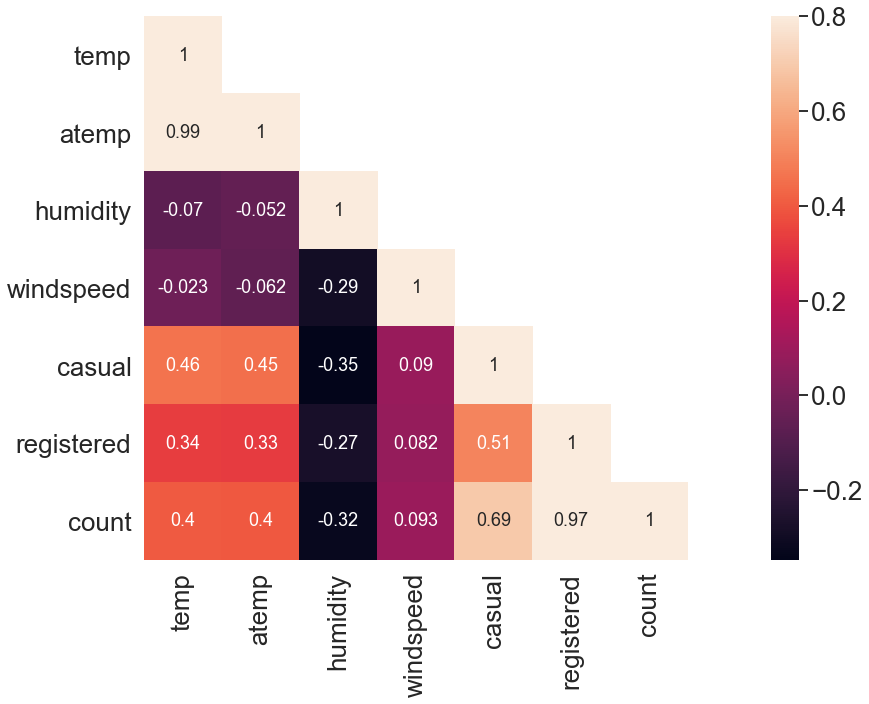

In [111]:
# Alternatively 

corrMat = df[['temp','atemp',
             'humidity', 'windspeed',
             'casual', 'registered',
             'count']].corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMat , mask= mask , annot= True, square= True,vmax=.8  );

**Observations:**

+ Correlation between temp and atemp is very high (as expected)
+ Same is te case with registered-total_count and casual-total_count
+ Windspeed to humidity has negative correlation
+ Overall correlational statistics are not very high.

In [109]:
set_option('precision' ,2)
df.corr()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,count
rec_id,1.00e+00,0.14,0.14,9.58e-03,-0.07,0.16,0.28,0.28
temp,1.36e-01,1.00,0.99,-6.99e-02,-0.02,0.46,0.34,0.40
atemp,1.38e-01,0.99,1.00,-5.19e-02,-0.06,0.45,0.33,0.40
humidity,9.58e-03,-0.07,-0.05,1.00e+00,-0.29,-0.35,-0.27,-0.32
windspeed,-7.45e-02,-0.02,-0.06,-2.90e-01,1.00,0.09,0.08,0.09
casual,1.58e-01,0.46,0.45,-3.47e-01,0.09,1.00,0.51,0.69
registered,2.82e-01,0.34,0.33,-2.74e-01,0.08,0.51,1.00,0.97
count,2.78e-01,0.40,0.40,-3.23e-01,0.09,0.69,0.97,1.00


In [130]:
# Checking the skewness of the attributes

# Positive skew value = right/positive skew
# negative skew value = left/negative skew

# values closer to 0 show less skew

df.skew()

rec_id           0.00e+00
season          -5.42e-03
year            -1.02e-02
month           -9.25e-03
hour            -1.07e-02
is_holiday       5.64e+00
weekday         -3.00e-03
is_workingday   -7.85e-01
weather          1.23e+00
temp            -6.02e-03
atemp           -9.04e-02
humidity        -1.11e-01
windspeed        5.75e-01
casual           2.50e+00
registered       1.56e+00
count            1.28e+00
dtype: float64

## 3. Data Preprocessing

+ After plotting a few graphs, first thing we notice here is that **temp** and **atemp** variables are highly correlated.So, we will be removing **atemp**.

+ Another problem are our **registered** and **casual variables.** Since we are trying to predict the total number of users for tomorrow, it’s impossible to have the number of registered and casual users because this is exactly what you are trying to predict.

+ **Windspeed** correlation with **count** is too low

In [114]:
df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [162]:
# Dropping the unnecessary features

df_new = df.drop(['atemp' ,'registered','casual','windspeed', 'rec_id' ,'datetime'] ,axis = 1)
df_new.head(2)

,season,year,month,hour,is_holiday,weekday,is_workingday,weather,temp,humidity,count
0,1,0,1,0,0,6,0,1,0.24,0.81,16
1,1,0,1,1,0,6,0,1,0.22,0.80,40


## 3.1 Checking the distribution of Count variable

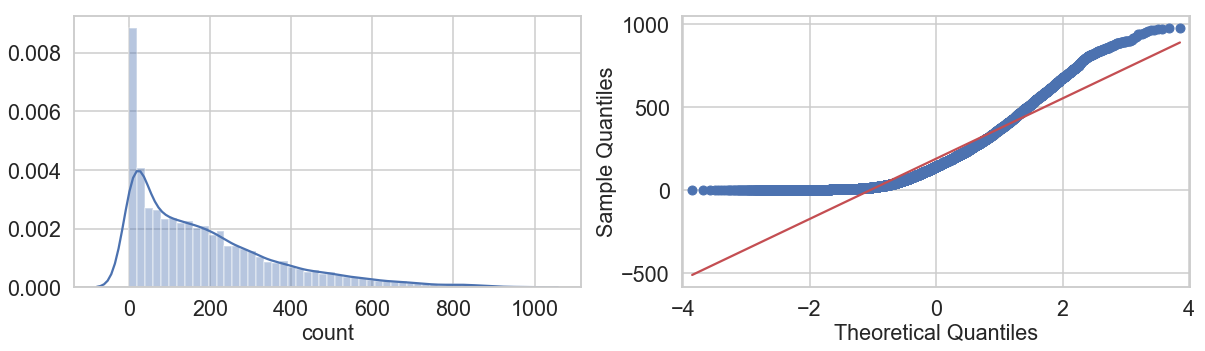

In [163]:
from statsmodels.graphics.gofplots import qqplot

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (20,5))
sns.distplot(df_new['count'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(df_new['count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles");

**This is not a Normal/Gaussian Distribution**

In [164]:
# applying log transformation on count variable to make it similar to a Gaussian/normal distribution


import math
df_new['count'] = df_new['count'].transform(lambda x: math.log(x))

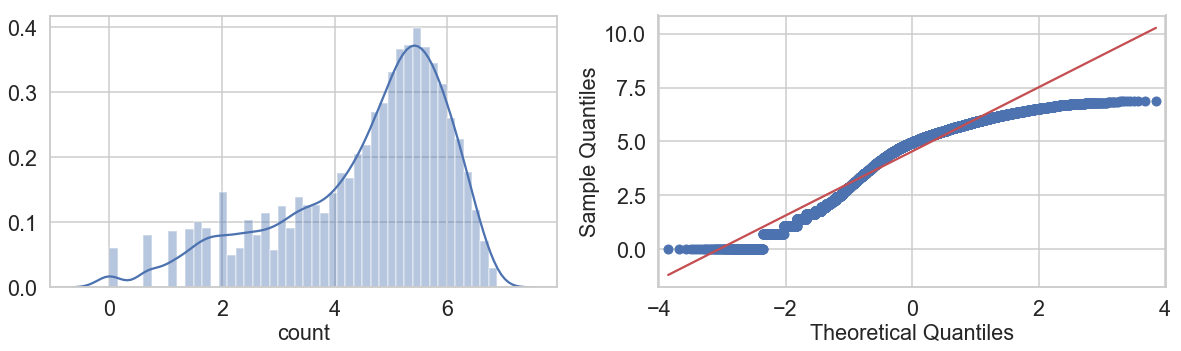

In [165]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (20,5))
sns.distplot(df_new['count'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(df_new['count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles");

**The count variable is a bit more similar to a normal distribution now**

## 3.2 One hot encoding th categorical data

In [166]:
df_new.dtypes

season           category
year             category
month            category
hour             category
is_holiday       category
weekday          category
is_workingday    category
weather          category
temp              float64
humidity          float64
count             float64
dtype: object

In [167]:
df_final = df_new

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'month', 'hour', 'is_holiday', 'weekday', 'is_workingday', 'weather']
for column in columns_to_dummify:
    df_final = dummify_dataset(df_final, column)
    
df_final.head(1)

,year,temp,humidity,count,season_2,season_3,season_4,month_2,month_3,month_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,is_workingday_1,weather_2,weather_3,weather_4
0,0,0.24,0.81,2.77,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## 3.3 Splitting the dataset

In [168]:
X = df_final.drop(['count'], axis = 1)
y = df_final['count']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 3.4 Evaluating algorithms baseline

**6 algoritms which work well with regression**
+ Linear Algorithms - Linear Regression,LASSO and ElasticNet
+ Non-linear algorithms - CART , SVR , KNN

AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor

In [173]:
# spot checking algorithms and ensemble models

models = []

models.append(('LR' , LinearRegression()))
models.append(('LASSO' , Lasso()))
models.append(('EN' , ElasticNet()))
models.append(('CART' , DecisionTreeRegressor()))
models.append(('SVR' , SVR()))
models.append(('KNN' , KNeighborsRegressor()))
models.append(('ADBoost' , AdaBoostRegressor()))
models.append(('RF' , RandomForestRegressor()))
models.append(('GBR' , GradientBoostingRegressor()))
models.append(('ET' , ExtraTreesRegressor()))

In [174]:
# test options and evaluation metric

num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'  # MSE gives us a gross idea of how wrong all predictions are (0 is perfect)

In [175]:
results = []
names = []

for name,model in models:
    kfold = KFold(n_splits= num_folds , random_state=seed)
    cv_results = cross_val_score(model , X_train, y_train, cv = kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s : %f (%f)' % (name , cv_results.mean() , cv_results.std())
    print(msg)

LR : -0.388839 (0.012468)
LASSO : -2.193893 (0.058421)
EN : -2.193893 (0.058421)
CART : -0.378865 (0.028094)
SVR : -0.342075 (0.013638)
KNN : -0.533598 (0.028557)
ADBoost : -1.265573 (0.051760)
RF : -0.231262 (0.016309)
GBR : -0.318477 (0.012367)
ET : -0.200196 (0.016386)


**Conclusion:**

+ We can see that Extra Tree Regressor has very good performance(since decision trees are less impacted by outliers)

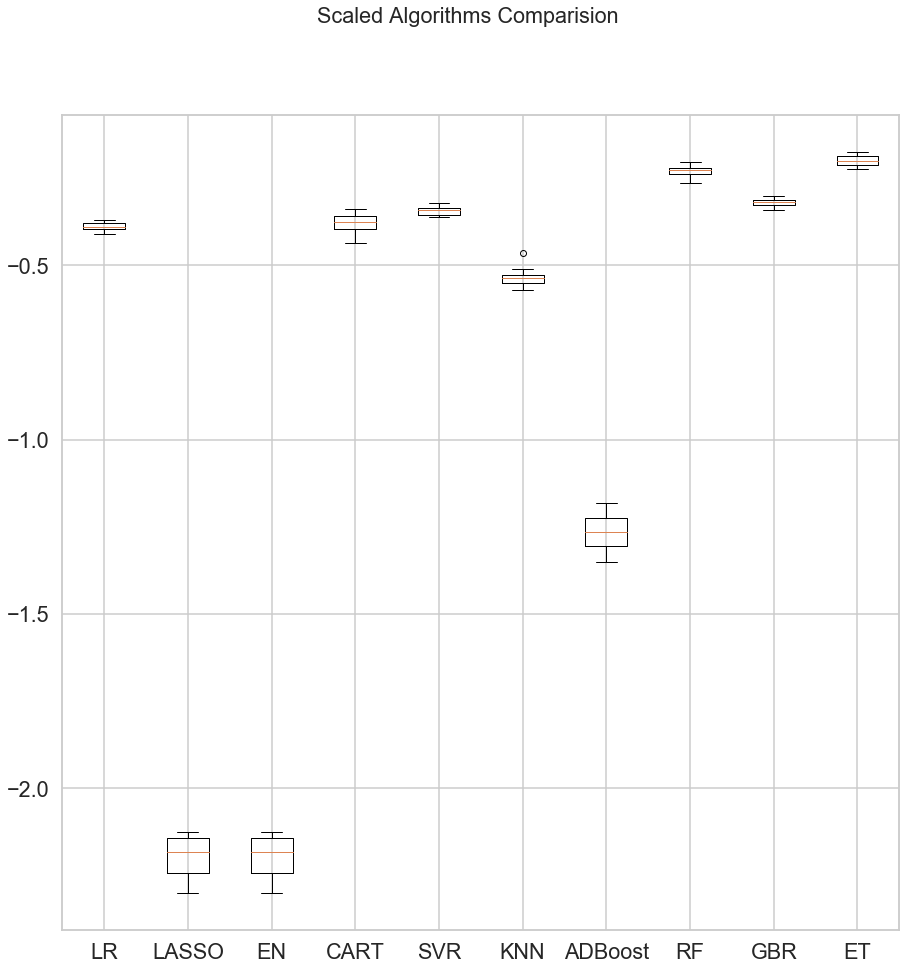

In [188]:
# plotting the distributions of scores of all algorithms

fig = plt.figure(figsize=(15,15))
plt.suptitle('Scaled Algorithms Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

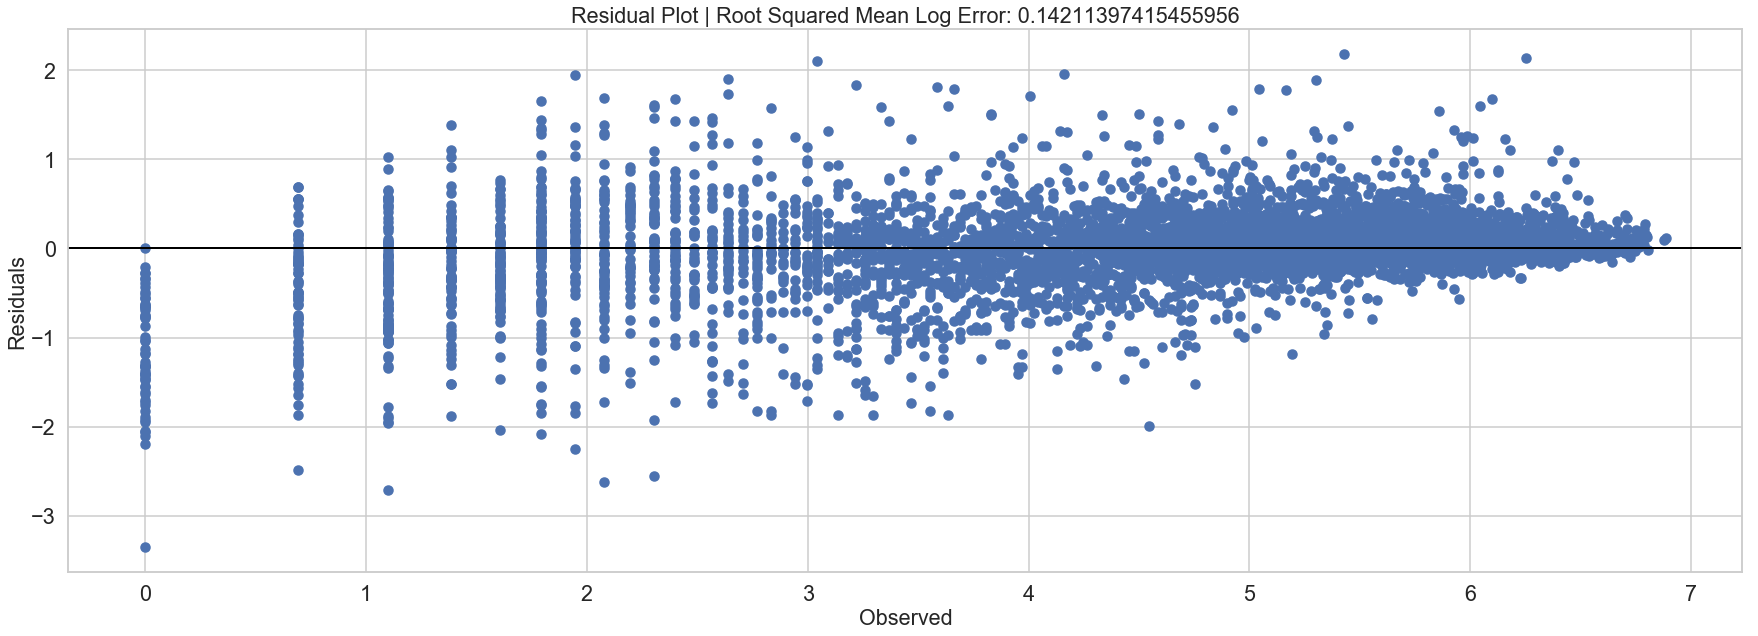

In [189]:
from sklearn.metrics import mean_squared_log_error
 
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
print()

# Plot the residuals
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root Squared Mean Log Error: ' + str(np.sqrt(mean_squared_log_error(y_test, y_pred))))
plt.show()

**RMS log error = 0.14**

## 3.5 Imporving the model

**We will be reducing the unnecessary features by using dimensionality reduction via PCA**

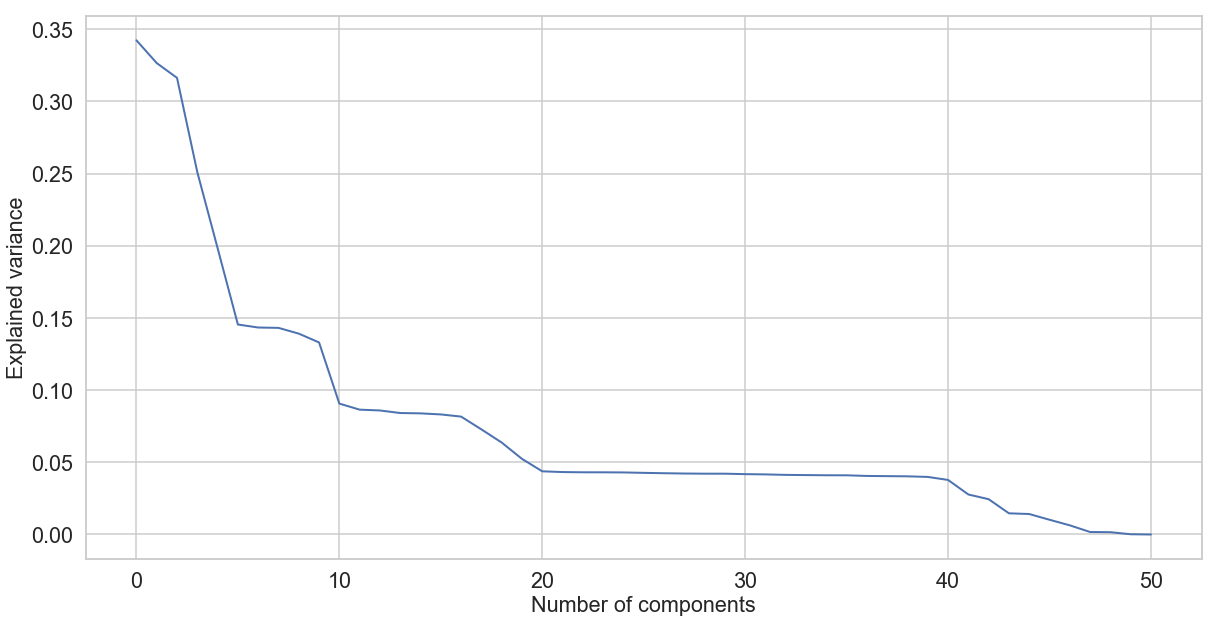

In [192]:
# Plot PCA spectrum

pca = PCA()
pca.fit(X_train)

plt.figure(1, figsize=(20, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

## 3.6 Hypertuning Parameter for ExtraTrees using GridSearch

In [195]:
etr = ExtraTreesRegressor()

pipeline = Pipeline(steps=[('pca', pca), 
                           ('etr', etr)])
print(pipeline.get_params())

{'memory': None, 'steps': [('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('etr', ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False))], 'pca': PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'etr': ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
    

In [196]:
hyperparameters = {'etr__n_estimators' : [10,100,500],
                   'etr__max_depth' : [None, 20, 50],
                   'pca__n_components' : [9,19,39]}

clf = GridSearchCV(pipeline,hyperparameters,cv=10)

clf.fit(X_train, y_train)

# Best params
print(clf.best_params_)

{'etr__max_depth': 50, 'etr__n_estimators': 500, 'pca__n_components': 39}


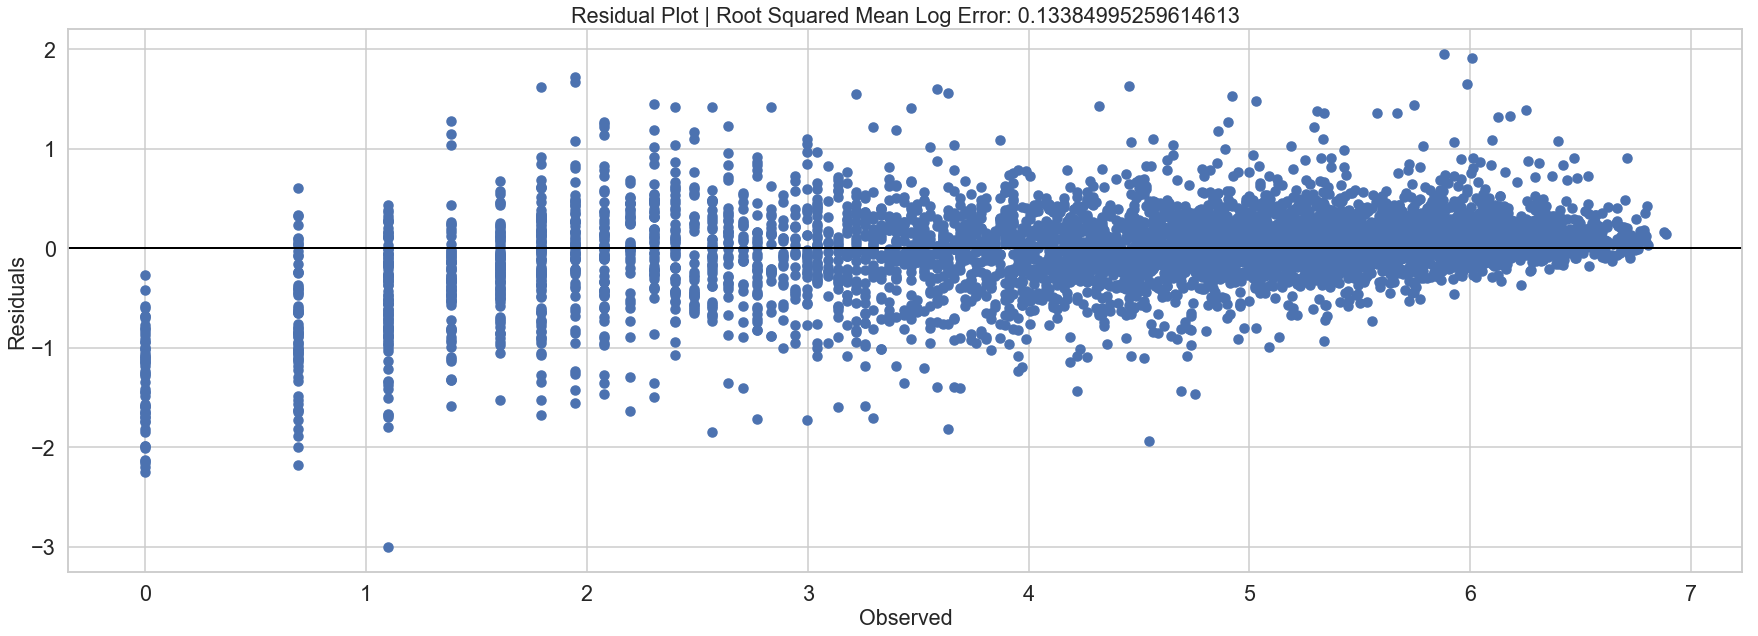

In [197]:
y_pred = clf.predict(X_test)

# Plot the residuals
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root Squared Mean Log Error: ' + str(np.sqrt(mean_squared_log_error(y_test, y_pred))))
plt.show()

**The error has reduced from 0.14 to 0.13**